In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

plt.rcParams.update({'figure.max_open_warning': 0})
pd.options.mode.chained_assignment = None

In [2]:
input_file = '~/Repositories/covid-19-data/public/data/owid-covid-data.csv'

n = 16
group_one = ['USA', 'IND']
fig_size = (12, 4)
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America']

today = datetime.today().strftime('%Y-%m-%d')
two_days = (datetime.today()-relativedelta(days=2)).strftime('%Y-%m-%d')
one_day = (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d')
one_month = (datetime.today()-relativedelta(months=1)).strftime('%Y-%m-%d')
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(months=12)).strftime('%Y-%m-%d')

last_day = two_days

graph_start_date = one_month

In [3]:
inp = pd.read_csv(input_file)

inp['new_tests_mean'] = inp['new_tests'].rolling(7).mean()
inp['new_cases_mean'] = inp['new_cases'].rolling(7).mean()
inp['new_deaths_mean'] = inp['new_deaths'].rolling(7).mean()
inp['new_vaccinations_mean'] = inp['new_vaccinations'].rolling(7).mean()

inp['new_tests_change_1w'] = inp['new_tests_mean'].pct_change(periods=6)*100
inp['new_cases_change_1w'] = inp['new_cases_mean'].pct_change(periods=6)*100
inp['new_deaths_change_1w'] = inp['new_deaths_mean'].pct_change(periods=6)*100
inp['new_vaccinations_change_1w'] = inp['new_vaccinations_mean'].pct_change(periods=6)*100

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['new_deaths_mean'].rolling(7).sum()/inp['new_cases_mean'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['new_cases_mean'].rolling(7).sum()/inp['new_tests_mean'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])

print(inp.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [4]:
top_n = inp[(inp['date'] == last_day) & ~inp['location'].isin(continents) & (inp['total_cases'] >= 1000000)].sort_values(
    'total_cases', ascending=False)['iso_code'].tolist()

if len(top_n) > n-1:
    top_n = top_n[0:n]
    
print(top_n)

['OWID_WRL', 'USA', 'IND', 'BRA', 'FRA', 'TUR', 'RUS', 'GBR', 'ITA', 'DEU', 'ESP', 'ARG', 'COL', 'POL', 'IRN', 'MEX']


In [5]:
df = inp[(inp['iso_code'].isin(top_n)) & (inp['date'] == last_day)][[
    'date', 'iso_code', 'population',
    'total_tests', 'total_cases', 'total_deaths', 'total_vaccinations',
    'new_tests_mean', 'new_cases_mean', 'new_deaths_mean', 'new_vaccinations_mean',
    'people_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'cfr', 'new_tests_change_1w', 'new_cases_change_1w', 'new_deaths_change_1w', 'new_vaccinations_change_1w']]

df['total_cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['total_deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)
df['new_cases_%_world'] = (df['new_cases_mean']*100)/int(df[df['iso_code'] == 'OWID_WRL']['new_cases_mean'])
df['new_deaths_%_world'] = (df['new_deaths_mean']*100)/int(df[df['iso_code'] == 'OWID_WRL']['new_deaths_mean'])

df.sort_values('total_cases', ascending=False).set_index('iso_code')

,date,population,total_tests,total_cases,total_deaths,total_vaccinations,new_tests_mean,new_cases_mean,new_deaths_mean,new_vaccinations_mean,...,new_tests_change_1w,new_cases_change_1w,new_deaths_change_1w,new_vaccinations_change_1w,total_cases_%_world,total_deaths_%_world,cases_1M_pop,deaths_1M_pop,new_cases_%_world,new_deaths_%_world
iso_code,,,,,,,,,,,,,,,,,,,,,
OWID_WRL,2021-05-20,7.794799e+09,NaN,165531431.0,3430326.0,1.590732e+09,NaN,622183.285714,12249.285714,2.648293e+07,...,0.000000,-12.753367,-2.192387,14.590619,100.000000,100.000000,21236,440,100.000046,100.002333
USA,2021-05-20,3.310026e+08,NaN,33056765.0,588539.0,2.793972e+08,NaN,29127.714286,552.142857,1.828681e+06,...,-23.241612,-15.988249,-8.930254,-6.285585,19.970084,17.156941,99868,1778,4.681535,4.507657
IND,2021-05-20,1.380004e+09,322356187.0,26031991.0,291331.0,1.878869e+08,NaN,283597.428571,4144.857143,1.360720e+06,...,-0.905890,-19.959794,3.855103,-34.112017,15.726313,8.492808,18863,211,45.581031,33.838331
BRA,2021-05-20,2.125594e+08,NaN,15894094.0,444094.0,5.596015e+07,NaN,65729.285714,1953.857143,8.074351e+05,...,0.000000,5.268878,1.206157,35.326550,9.601859,12.946116,74774,2089,10.564301,15.951156
FRA,2021-05-20,6.756425e+07,NaN,5979099.0,108343.0,NaN,NaN,10965.142857,133.142857,NaN,...,3.938611,-23.977616,-29.500756,3.050273,3.612063,3.158388,88495,1603,1.762366,1.086969
TUR,2021-05-20,8.433907e+07,51731883.0,5160423.0,45626.0,2.708337e+07,210277.142857,10918.142857,223.857143,2.401567e+05,...,-1.819351,-21.453017,-14.651416,93.017886,3.117488,1.330078,61186,540,1.754812,1.827554
RUS,2021-05-20,1.459345e+08,135005007.0,4917906.0,115393.0,2.516696e+07,318583.285714,8657.571429,371.142857,3.405754e+05,...,13.778468,3.580707,6.170821,43.385087,2.970980,3.363908,33699,790,1.391483,3.029985
GBR,2021-05-20,6.788600e+07,NaN,4471065.0,127963.0,NaN,NaN,1522.857143,7.285714,NaN,...,-3.763956,-32.748722,-29.166667,2.128289,2.701037,3.730345,65861,1884,0.244760,0.059480
ITA,2021-05-20,6.046183e+07,63822748.0,4178261.0,124810.0,2.940991e+07,245075.142857,5585.857143,152.142857,4.842857e+05,...,-8.399072,-27.557202,-26.904598,1.994642,2.524150,3.638430,69105,2064,0.897784,1.242084


<AxesSubplot:title={'center':'World total vaccinations'}, xlabel='date'>

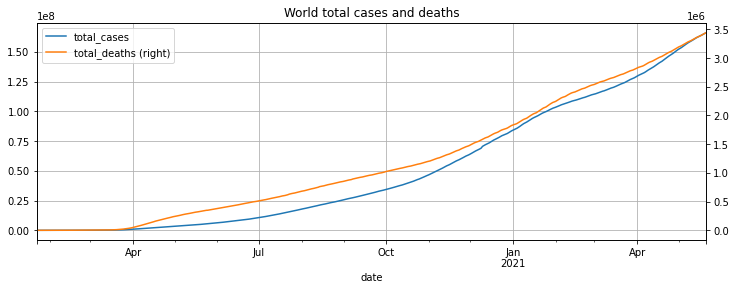

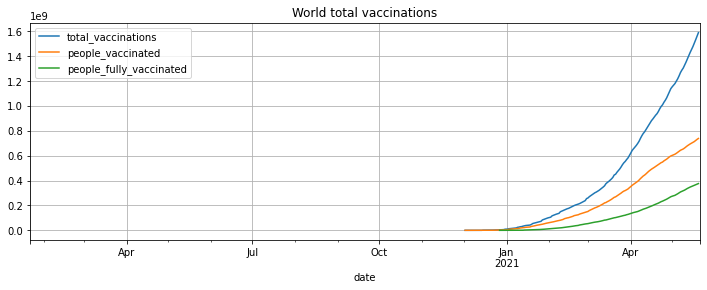

In [6]:
inp[(inp['iso_code'] == 'OWID_WRL')].plot(
    x='date', y=['total_cases', 'total_deaths'],
    secondary_y=['total_deaths'],
    style=['-', '-'], figsize=fig_size, grid=True, title='World total cases and deaths')

inp[(inp['iso_code'] == 'OWID_WRL')].plot(
    x='date', y=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'],
    style=['-', '-', '-'], figsize=fig_size, grid=True, title='World total vaccinations')

<AxesSubplot:title={'center':'People vaccinated per hundred'}, xlabel='iso_code'>

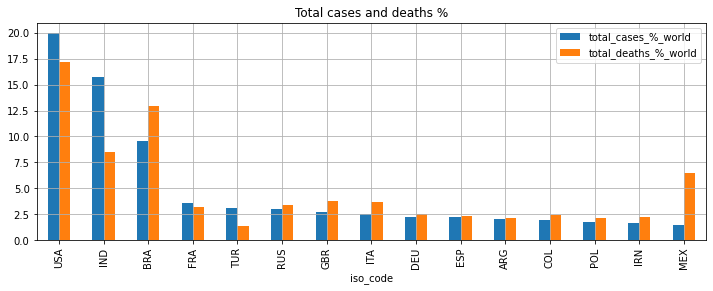

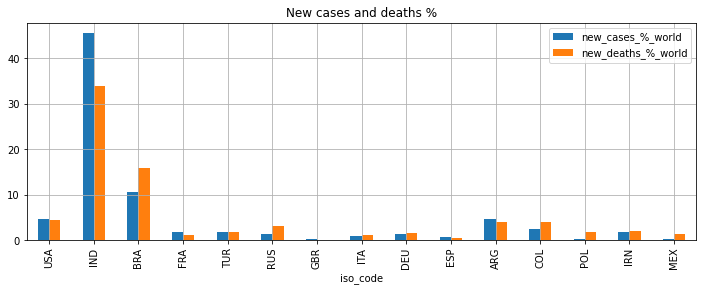

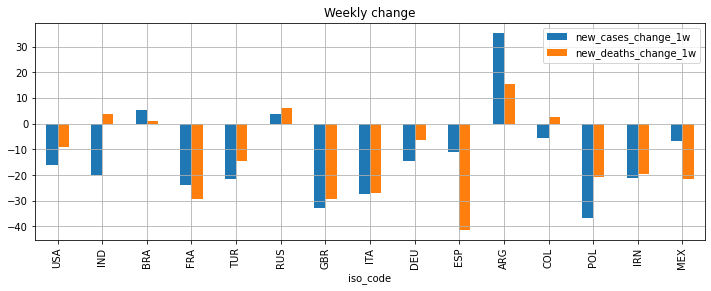

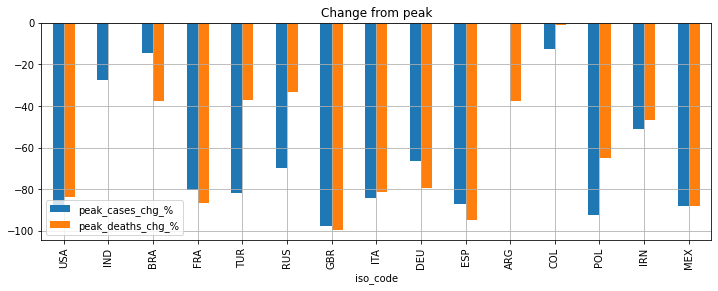

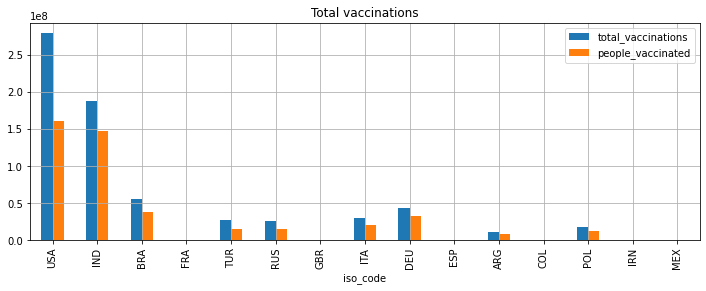

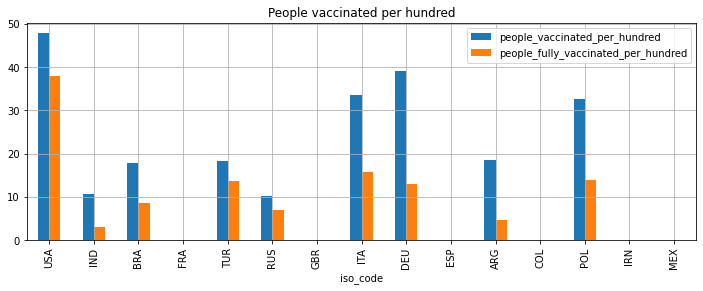

In [7]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_cases_%_world', 'total_deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Total cases and deaths %')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['new_cases_%_world', 'new_deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='New cases and deaths %')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['new_cases_change_1w', 'new_deaths_change_1w'],
    kind='bar', figsize=fig_size, grid=True, title='Weekly change')

df_max = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] <= last_day)].groupby('iso_code')[['new_cases_mean', 'new_deaths_mean']].max()
df_last = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)][['iso_code', 'new_cases_mean', 'new_deaths_mean']].set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'new_cases_mean': 'peak_cases_chg_%','new_deaths_mean': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Change from peak')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_vaccinations', 'people_vaccinated'],
    kind='bar', figsize=fig_size, grid=True, title='Total vaccinations')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'],
    kind='bar', figsize=fig_size, grid=True, title='People vaccinated per hundred')

<AxesSubplot:title={'center':'Top new vaccinations change'}, xlabel='iso_code'>

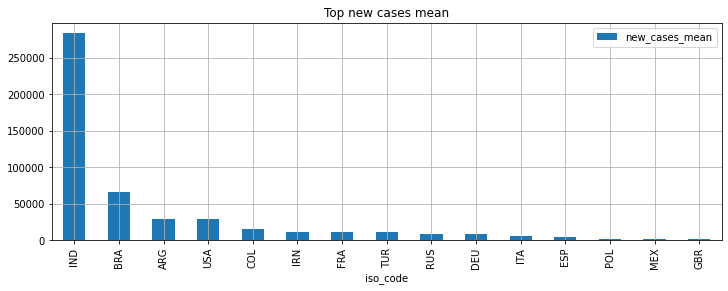

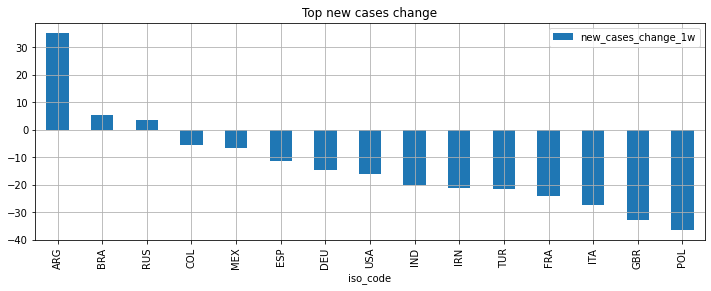

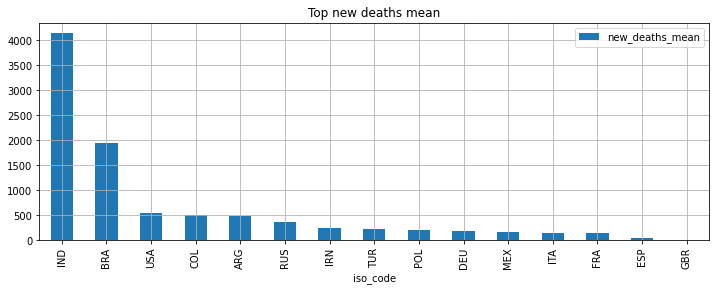

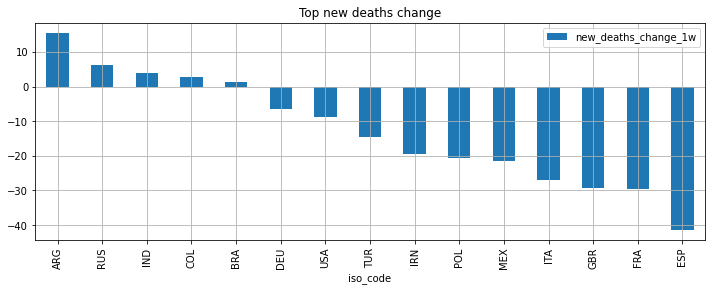

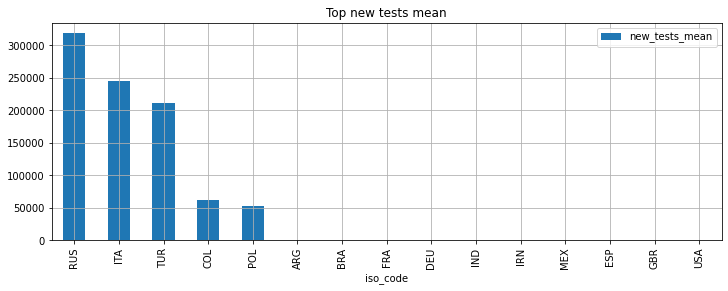

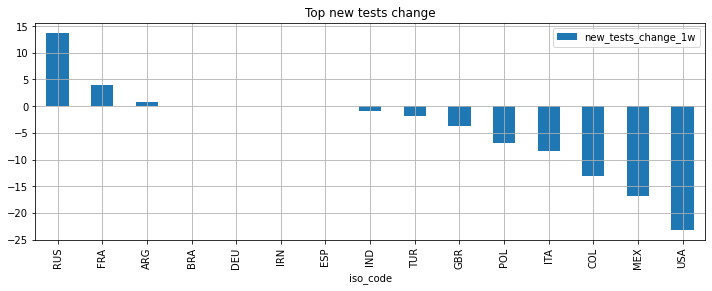

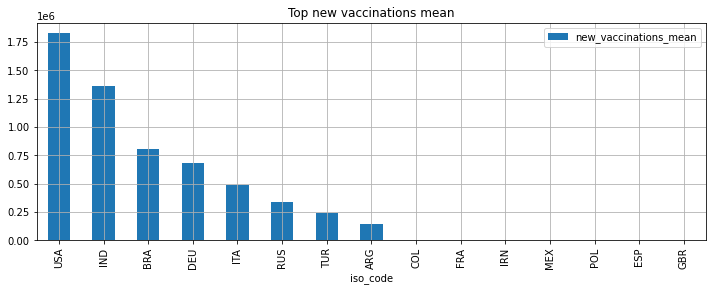

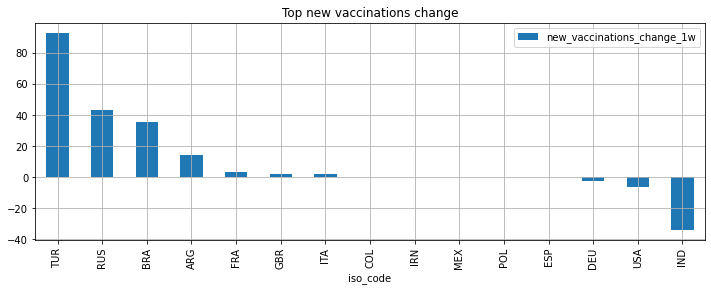

In [8]:
inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_cases_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_cases_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new cases mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_cases_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_cases_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new cases change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_deaths_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_deaths_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new deaths mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_deaths_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new deaths change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_tests_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_tests_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new tests mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_tests_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_tests_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new tests change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_vaccinations_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_vaccinations_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new vaccinations mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_vaccinations_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_vaccinations_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new vaccinations change')

In [9]:
def plot_all(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_cases_mean', 'new_deaths_mean', 'hosp_patients'],
        secondary_y=['new_deaths_mean'],
        style=['-', '-', '--'], figsize=fig_size, grid=True, title=country+' (cases and deaths)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_cases_mean', 'new_deaths_mean', 'hosp_patients', 'new_cases', 'new_deaths'],
        secondary_y=['new_deaths_mean', 'new_deaths'],
        style=['-', '-', '--', 'o', 'o'], figsize=fig_size, grid=True, title=country+' (recent cases and deaths)')
    
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_vaccinations_mean'],
        style=['-'], figsize=fig_size, grid=True, title=country+' (vaccinations)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_vaccinations_mean', 'new_vaccinations'],
        style=['-', 'o'], figsize=fig_size, grid=True, title=country+' (recent vaccinations)')
    
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_tests_mean'],
        style=['-'], figsize=fig_size, grid=True, title=country+' (tests)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_tests_mean', 'new_tests'],
        style=['-', 'o'], figsize=fig_size, grid=True, title=country+' (recent tests)')

    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)

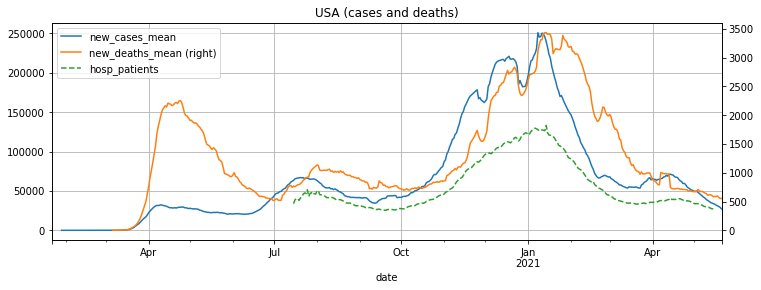

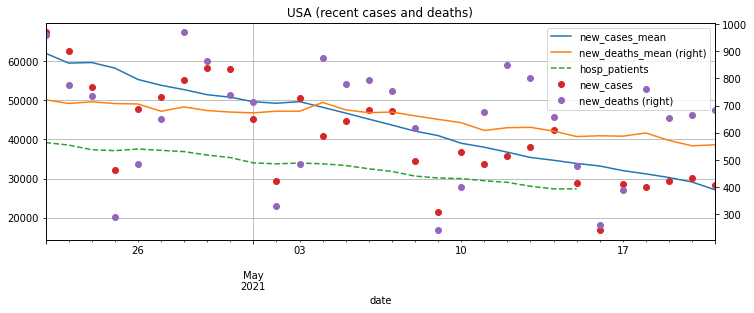

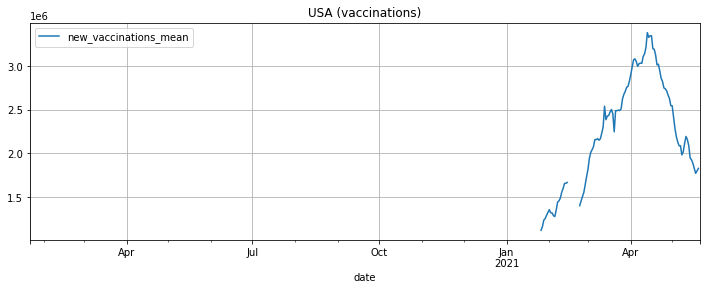

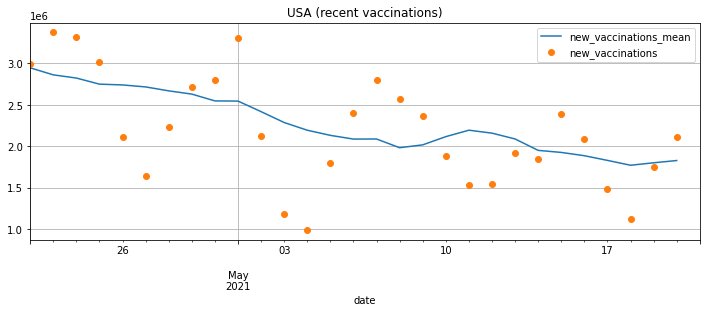

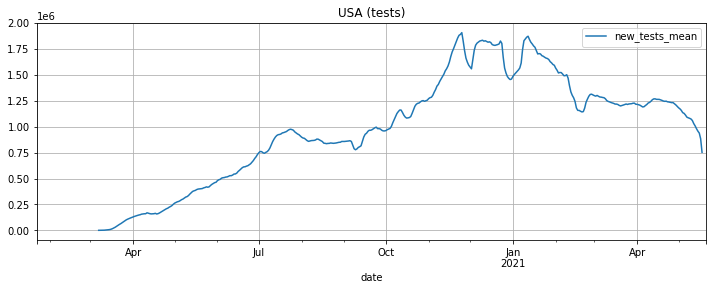

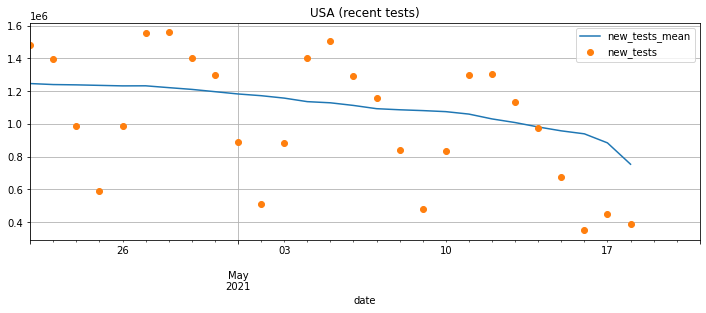

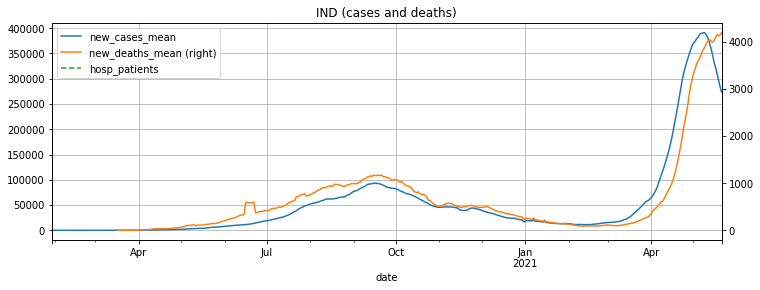

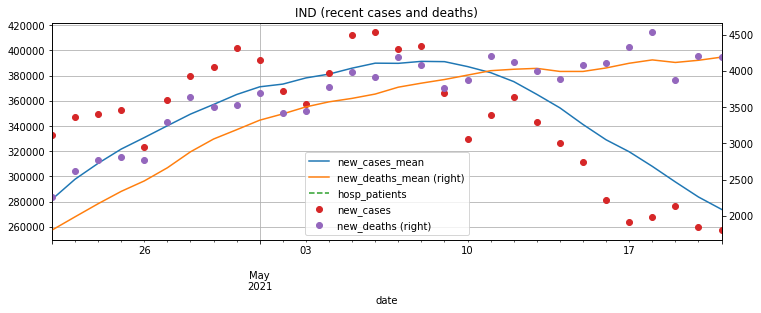

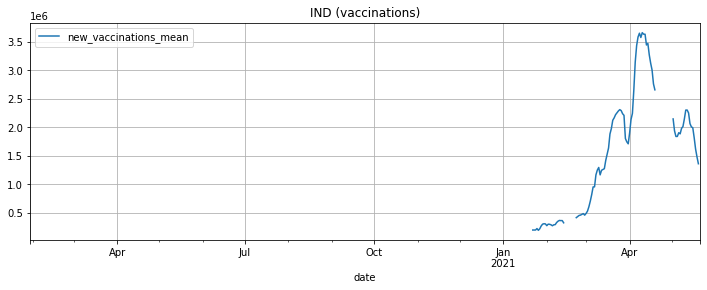

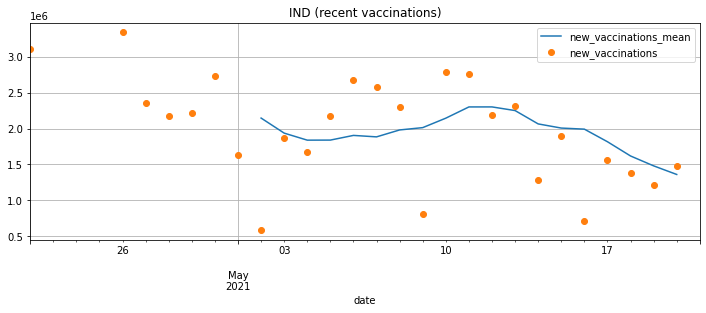

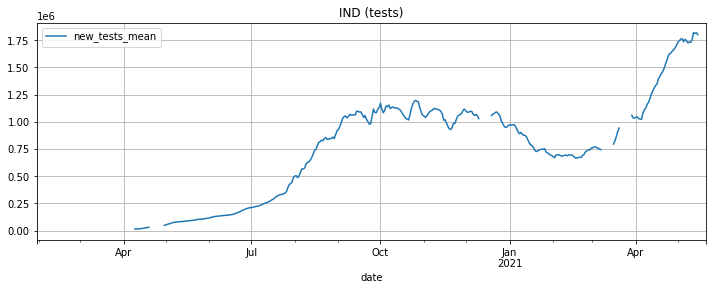

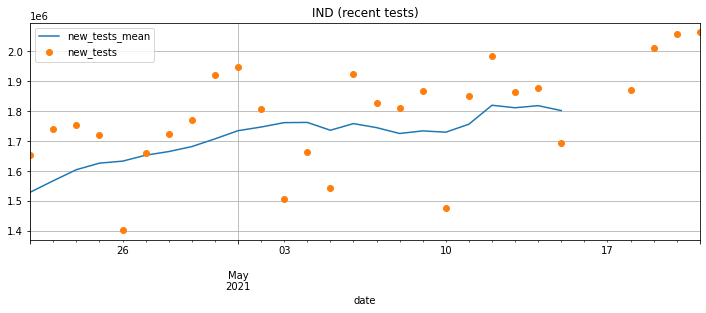

In [10]:
for country in group_one:
    plot_all(inp, iso_code=country)

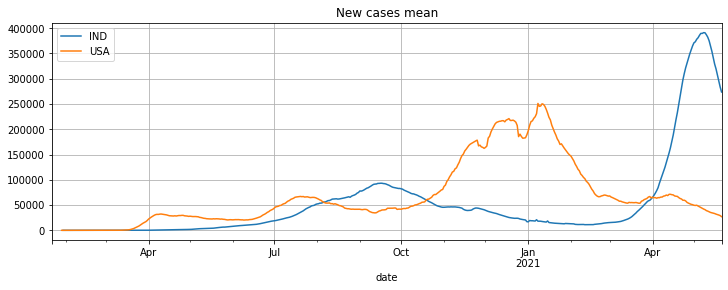

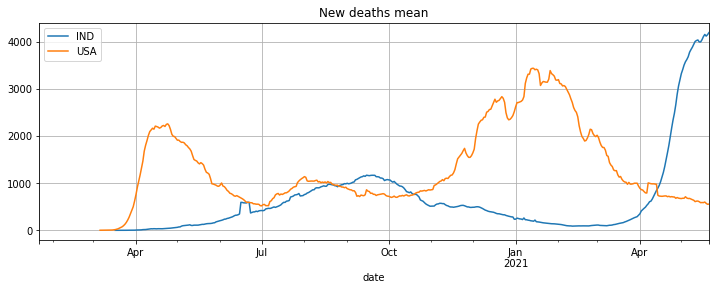

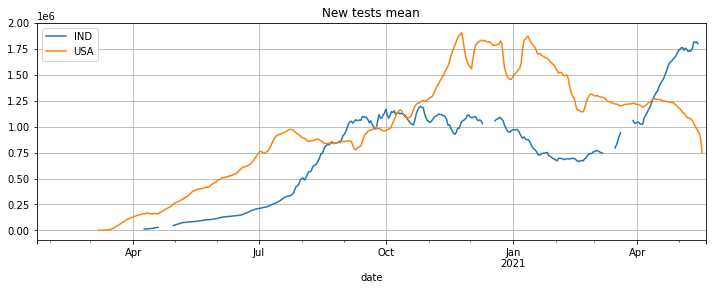

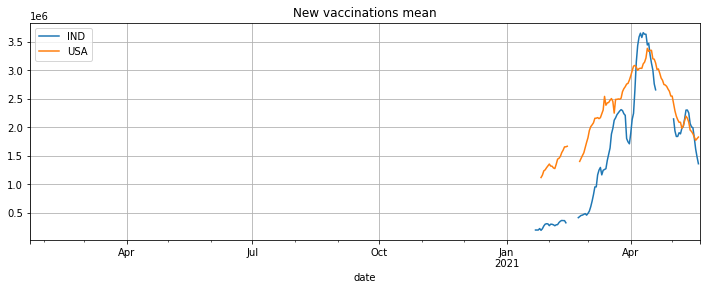

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_cases_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New cases mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_deaths_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New deaths mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_tests_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New tests mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_vaccinations_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New vaccinations mean')
axes.legend(list(sorted(group_one)))

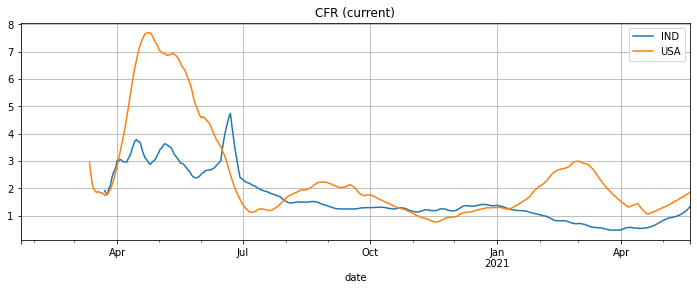

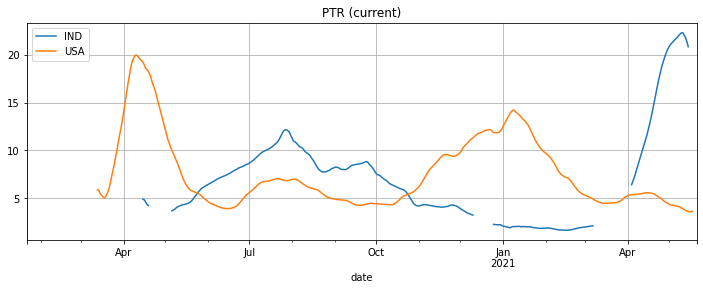

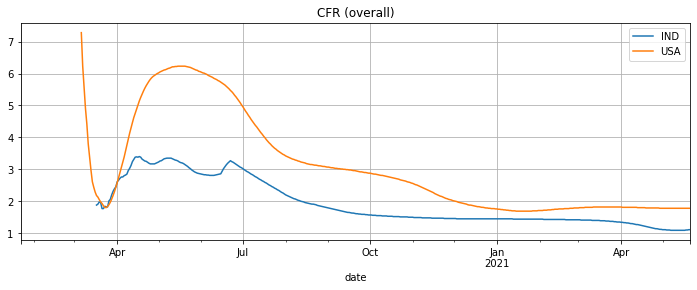

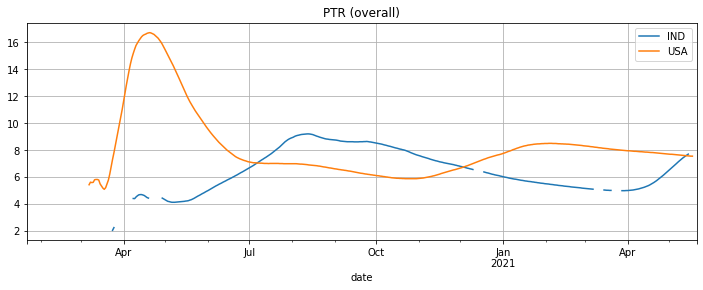

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR (current)')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR (current)')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR (overall)')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR (overall)')
axes.legend(list(sorted(group_one)))

<AxesSubplot:title={'center':'Continents totals'}, xlabel='location'>

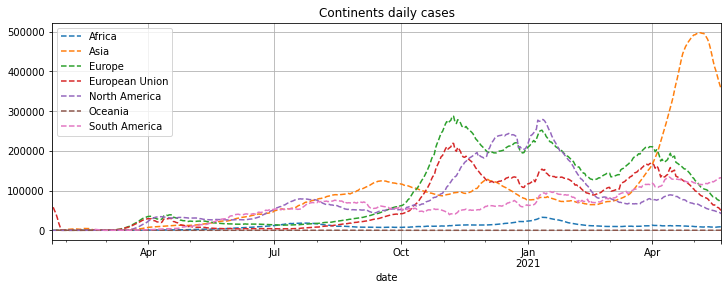

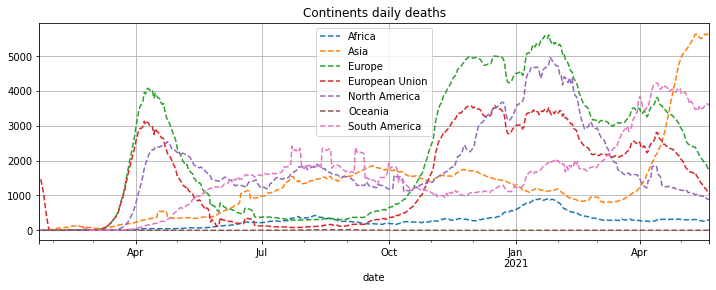

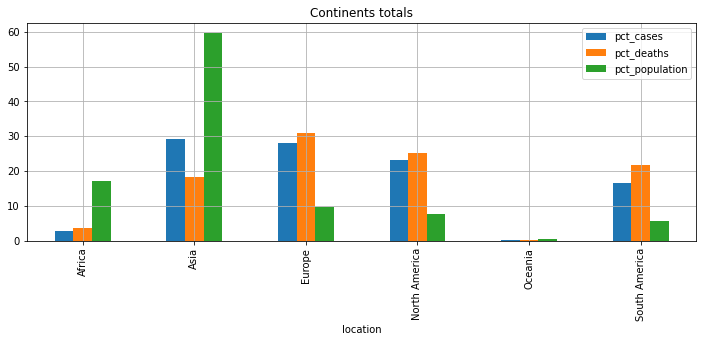

In [13]:
inp_continents = inp[inp['location'].isin(continents)]

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='new_cases_mean', style=['--'],
        figsize=fig_size, grid=True, ax=axes, title='Continents daily cases')

axes.legend(list(sorted(continents)))

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='new_deaths_mean', style=['--'],
        figsize=fig_size, grid=True, ax=axes, title='Continents daily deaths')
    
axes.legend(list(sorted(continents)))

inp_continents_current = inp_continents[(inp_continents['location'] != 'European Union') &
                                        (inp_continents['date'] == last_day)]

inp_continents_current['pct_cases'] = inp_continents_current['total_cases']*100/inp_continents_current['total_cases'].sum()
inp_continents_current['pct_deaths'] = inp_continents_current['total_deaths']*100/inp_continents_current['total_deaths'].sum()
inp_continents_current['pct_population'] = [17.2, 59.54, 9.59, 7.6, 0.55, 5.53]

inp_continents_current.plot(
    x='location', y=['pct_cases', 'pct_deaths', 'pct_population'],
    kind='bar', figsize=fig_size, grid=True, title='Continents totals')